# TELECOM CUSTOMER CHURN PREDICTION

* Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
* Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself
* Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.
* To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Objectives

###### I will explore the data and try to answer some questions like:

* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis

## Steps followed during whole analysis:-
* Step 1: Gather the data
* Step 2: Assess and clean the data
* Step 3: Conduct exploratory data analysis to answer the questions & create visualizations (Final visualization code)
* Step 4: Train,adjust and evaluate the model.
* Step 5: Summaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10));


<Figure size 1080x720 with 0 Axes>

### Understanding the data
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### A brief explanation of this dataset:
###### This dataset is IBM Sample Data Sets that I founded at Kaggle.

* Each row represents a customer; each column contains the customer’s attributes described in the column Metadata.
* The data set includes information about:
* Customers who left within the last month — the column is called Churn.
* Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information — how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers — gender, age range, and if they have partners and dependents

### The data set includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers – gender, age range, and if they have partners and dependent

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Manipulation

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

So,almost all features are of object type.

Since Total Charge column contain numeric data but its type is object so let fix it.

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')


* Lets check for null values in our data.

In [8]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Only Total charge columns have null values
* So, we have 2 options we can drop the rows which contains the null values or we can fill it various imputation technique.

#### Lets drop the all null values


### Visualize missing values


In [9]:
df = df.dropna()
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there is no missing data.

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

#### Lets look the balance of class labels.

In [11]:
df["Churn"].value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

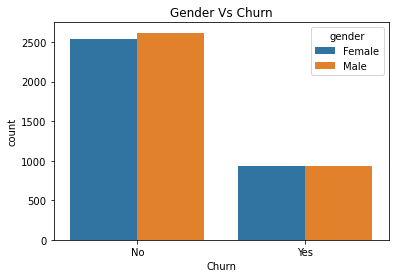

In [12]:
sns.countplot(data=df, x="Churn",hue="gender")
plt.title("Gender Vs Churn");

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

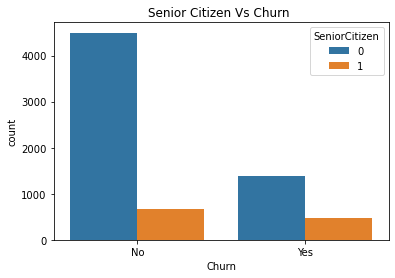

In [13]:
sns.countplot(data=df,x="Churn",hue="SeniorCitizen")
plt.title("Senior Citizen Vs Churn ");

the rate of churning is high among the non senior citizen.

##### Lets look at the distribution of Churn with Total Charges

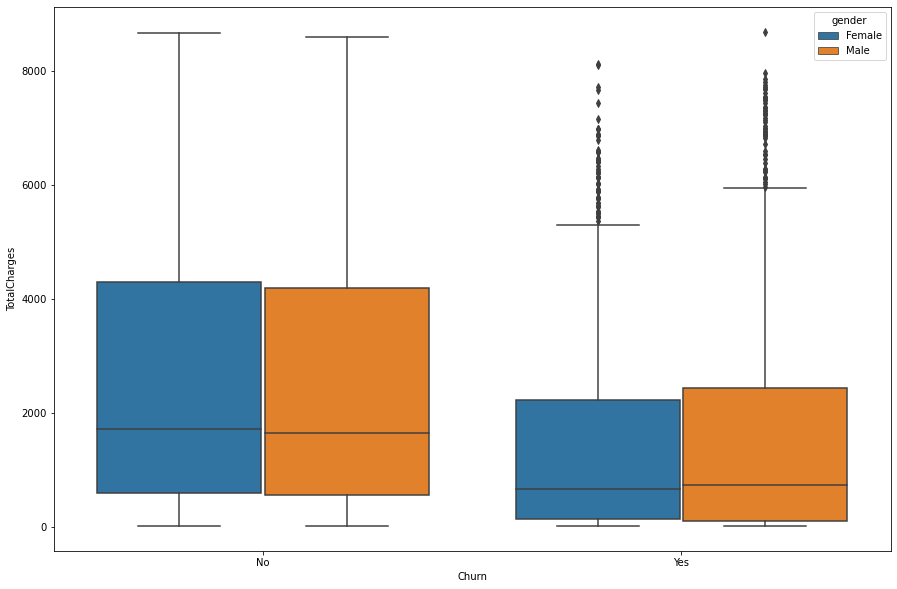

In [14]:
plt.figure(figsize=(15,10));
sns.boxplot(data=df,x="Churn",y="TotalCharges",hue="gender");


there is similar distribution of male and feamle and the pepole who have higher total charges are less likely to churn.


(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

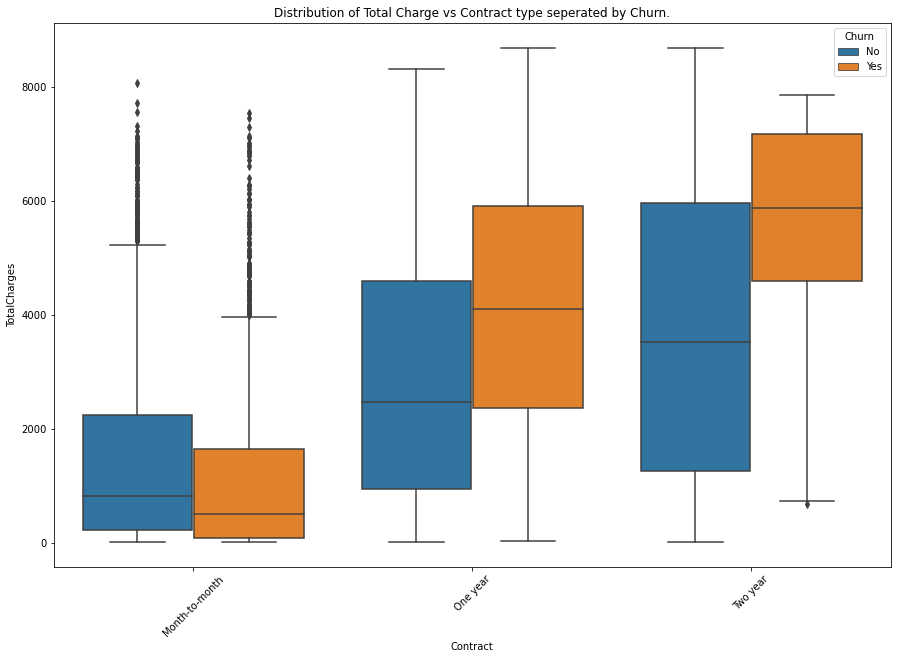

In [15]:
plt.figure(figsize=(15,10));
sns.boxplot(data=df,x="Contract",y="TotalCharges",hue="Churn")
plt.title("Distribution of Total Charge vs Contract type seperated by Churn.")
plt.xticks(rotation=45)


So,here pepole who have contract for more time and who paid more are likely to churn.
We can reedem them by providing some offers after 1 year or 2 year completion

<AxesSubplot:xlabel='Churn', ylabel='count'>

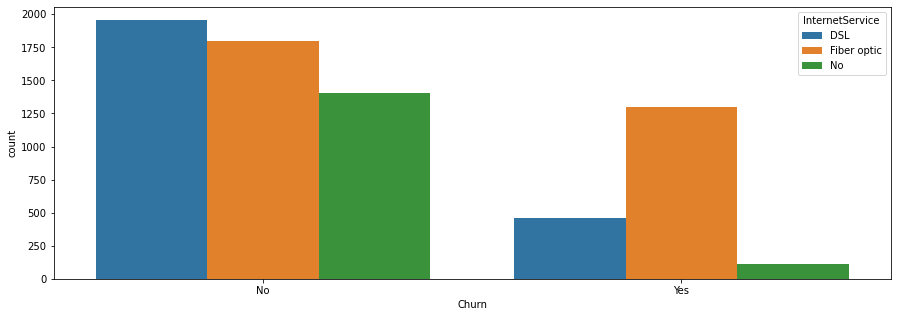

In [16]:
plt.figure(figsize=(15,5));
sns.countplot(x='Churn',data=df, hue='InternetService')

We can see that people using Fiber-optic services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

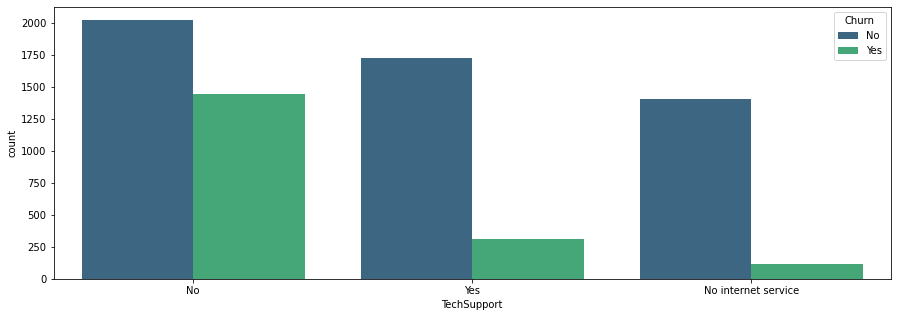

In [17]:
plt.figure(figsize=(15,5));
sns.countplot(x='TechSupport',data=df, hue='Churn',palette='viridis')


Those customers who don’t have tech support have churned more, which is
pretty self-explanatory. This also highlights the fact that the tech
support provided by the company is up to the mark.

## Lets look at the correlation of features with churn.

Since most features are categorical feature so let first create dummy varibale of some important feature and than apply corr( ) function to get he correlation with respect to yes churn.

In [18]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [19]:
corr_df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982


In [20]:
corr_df["Churn_Yes"].sort_values().iloc[1:-1]


Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

Also ploting the correlation

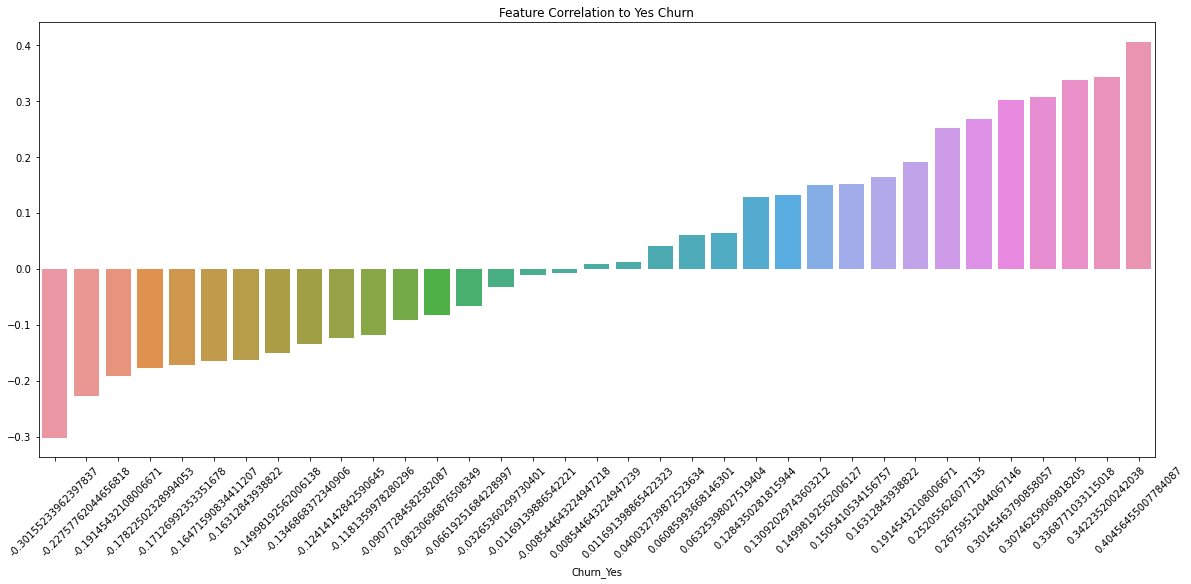

In [21]:
plt.figure(figsize=(20,8));

sns.barplot(data=corr_df["Churn_Yes"].sort_values().iloc[1:-1],x=corr_df["Churn_Yes"].sort_values().iloc[1:-1].index,y=corr_df["Churn_Yes"].sort_values().iloc[1:-1].values)
plt.xticks(rotation=45);
plt.title("Feature Correlation to Yes Churn");

## Part 3: Churn Analysis

This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.

Lets find the different types of contract that is available.

In [22]:
df['Contract'].unique()


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

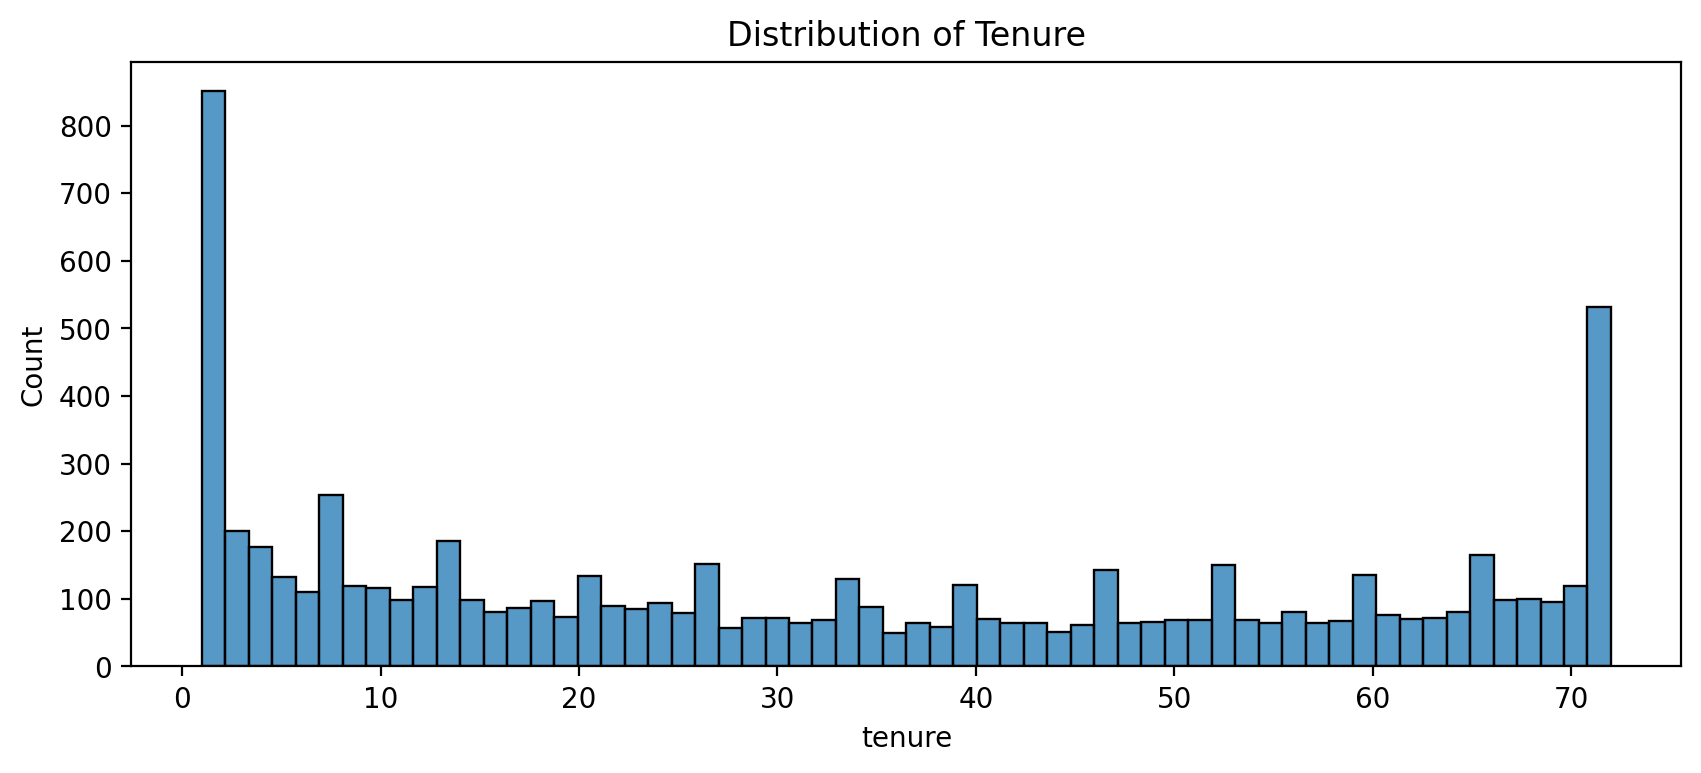

In [23]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)
plt.title("Distribution of Tenure");

* more people have 1 or 2 month tenure and then more number of people is of more than 2 years contract type.

* So, here we can conclude that either customer need the service for short duration of time or a very long duration of time.

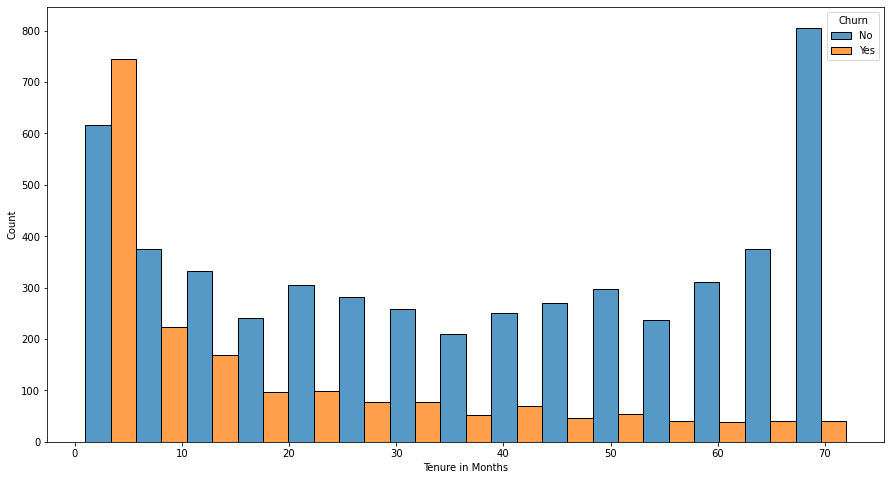

In [24]:
plt.figure(figsize=(15,8));

ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count");

The churn amount is higher in the initial 5 months, which is usually the
time when the new customers try out the service and decide whether to
continue or cancel. This pretty much can be attributed to the
uncertainty in the customer’s mind.

### Ploting Total Charge vs Monthly Charges with separated by churn.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

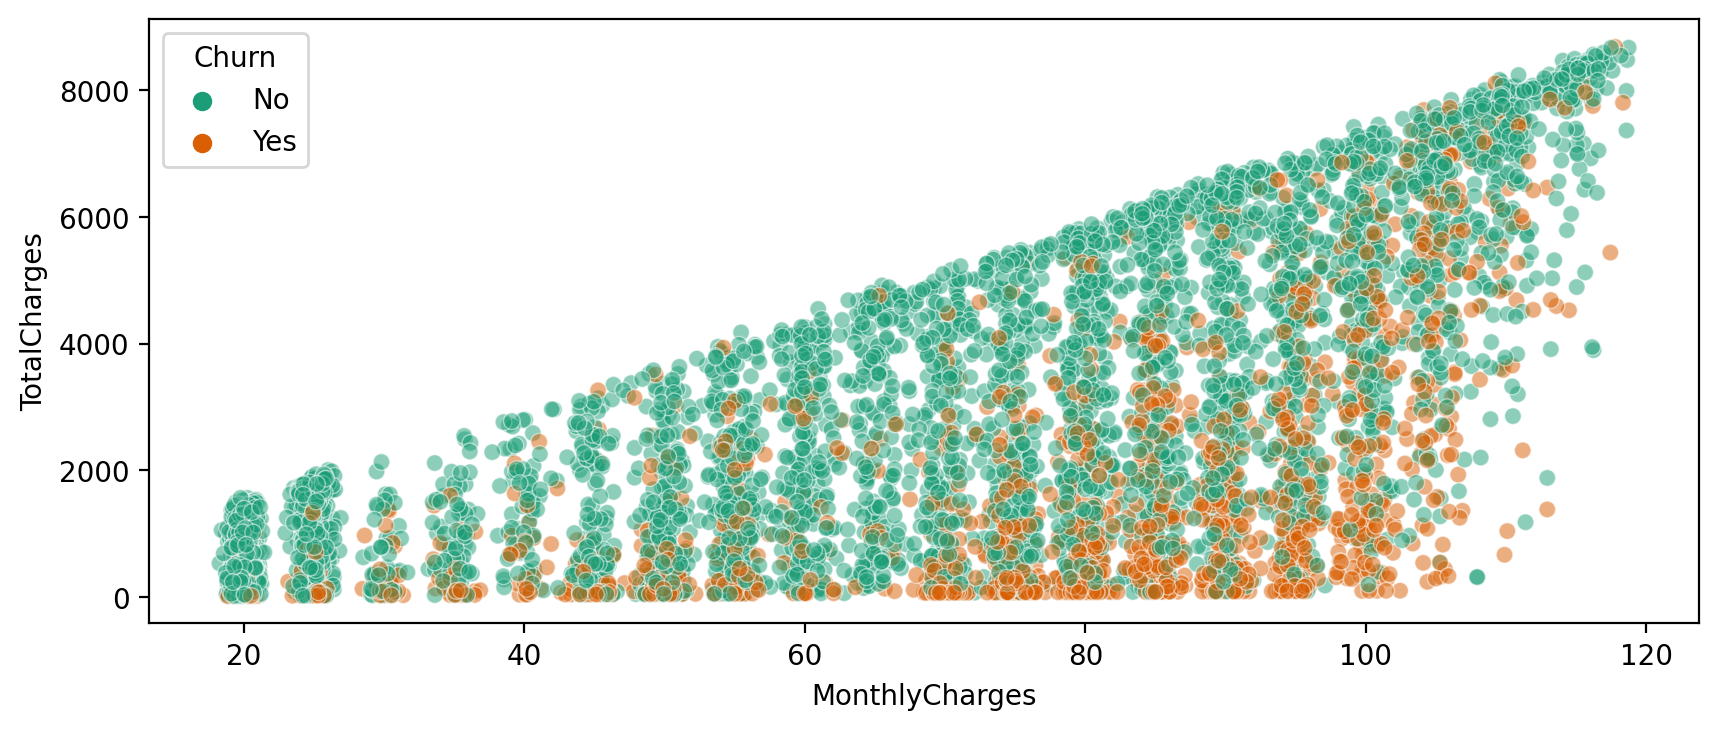

In [25]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

Here people who have more monthly charge instead of having lower total charge is more likely to churn.



### Lets look the churn rate of cusmtomer based on tenure month.

In [26]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [27]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)


In [28]:
churn_rate.transpose()['customerID']


tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

##### ploting the same.

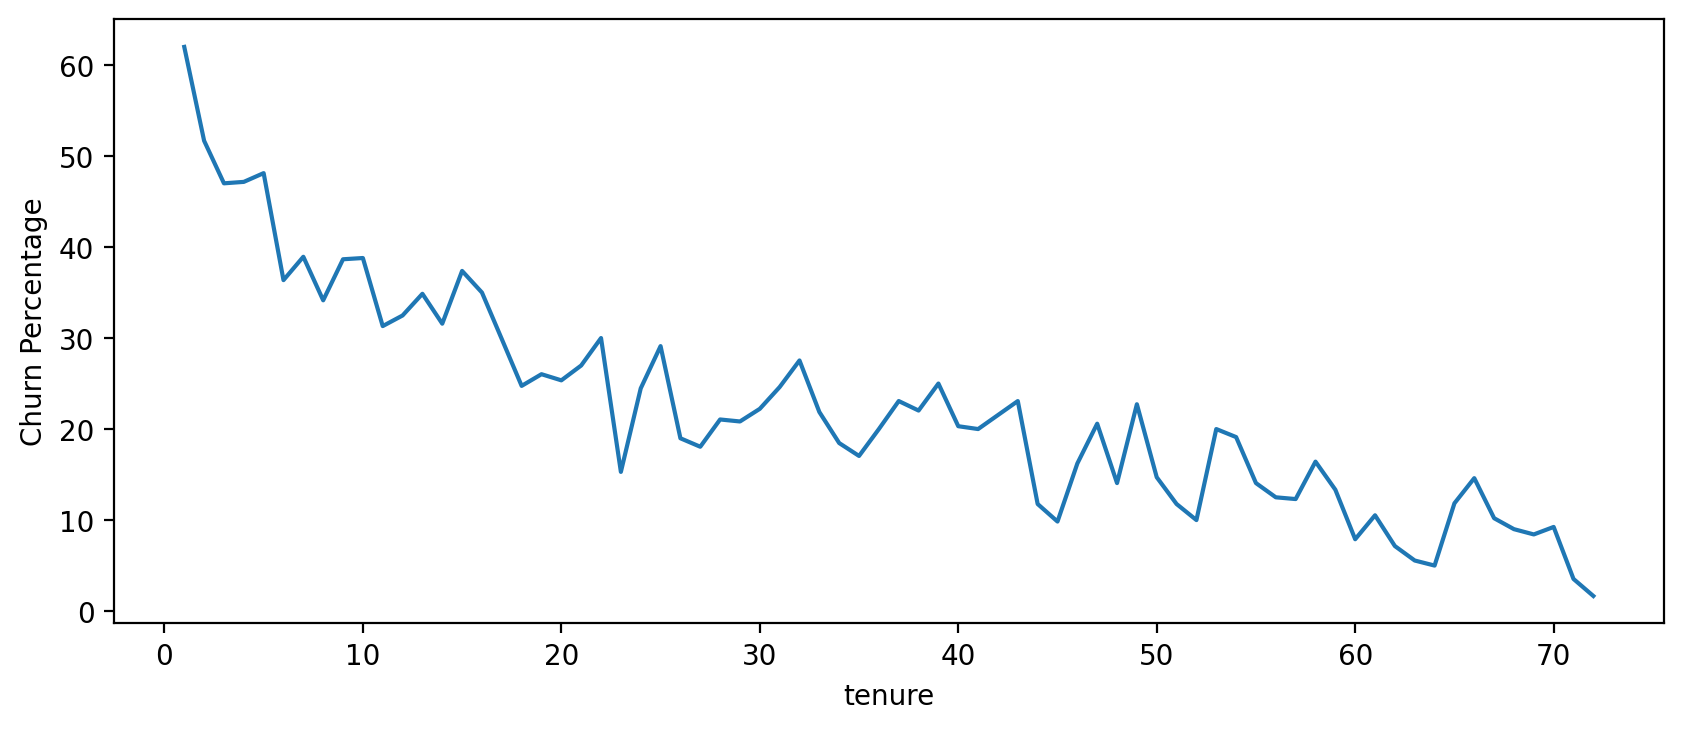

In [29]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

churn rate gradually decreases with the increase of tenure

## Predictive Modeling

Separating our data into features and labels

In [30]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [31]:
y = df['Churn']


A train test split, holding out 20% of the data for testing. We'll use a random_state of 101 to comapre different types of model.

In [32]:
from sklearn.model_selection import train_test_split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


## Normalizing our feature since we are also going to use distance based modal.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [37]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report


 ## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))

0.8073916133617626


## Decision tree

* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the basis of features of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
* A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

### How does the Decision Tree algorithm Work?
* Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
* Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
* Step-3: Divide the S into subsets that contains possible values for the best attributes.
* Step-4: Generate the decision tree node, which contains the best attribute.
* Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [40]:
preds = dt.predict(X_test)

In [41]:
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1052
         Yes       0.63      0.40      0.49       355

    accuracy                           0.79      1407
   macro avg       0.72      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



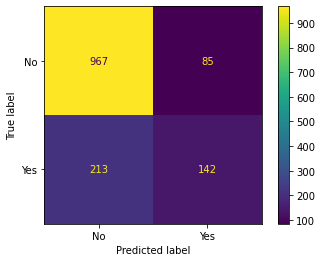

In [42]:
plot_confusion_matrix(dt,X_test,y_test)


* So, we have achieved accuracy of 0.79
* Lets find the optimum hyperparameter using Gridsearch.

In [43]:
param_grid_dt = {"criterion" : ["gini", "entropy"],
             "max_depth":[1,2,6,10,14,20],
             }

In [44]:
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(estimator=dt,param_grid=param_grid_dt)


In [45]:
grid_dt.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 6, 10, 14, 20]})

In [46]:
grid_dt.best_params_


{'criterion': 'gini', 'max_depth': 2}

In [47]:
grid_dt_pre=grid_dt.predict(X_test)


In [48]:
confusion_matrix(y_test,grid_dt_pre)


array([[983,  69],
       [213, 142]], dtype=int64)

In [49]:
print(classification_report(y_test,grid_dt_pre))


              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1052
         Yes       0.67      0.40      0.50       355

    accuracy                           0.80      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.78      0.80      0.78      1407



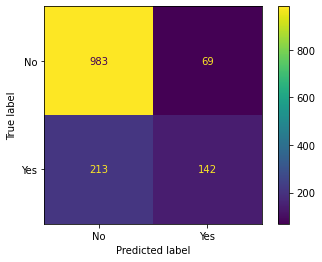

In [50]:
plot_confusion_matrix(grid_dt,X_test,y_test)


## Lets plot the Decission Tree .

In [51]:
from sklearn.tree import plot_tree

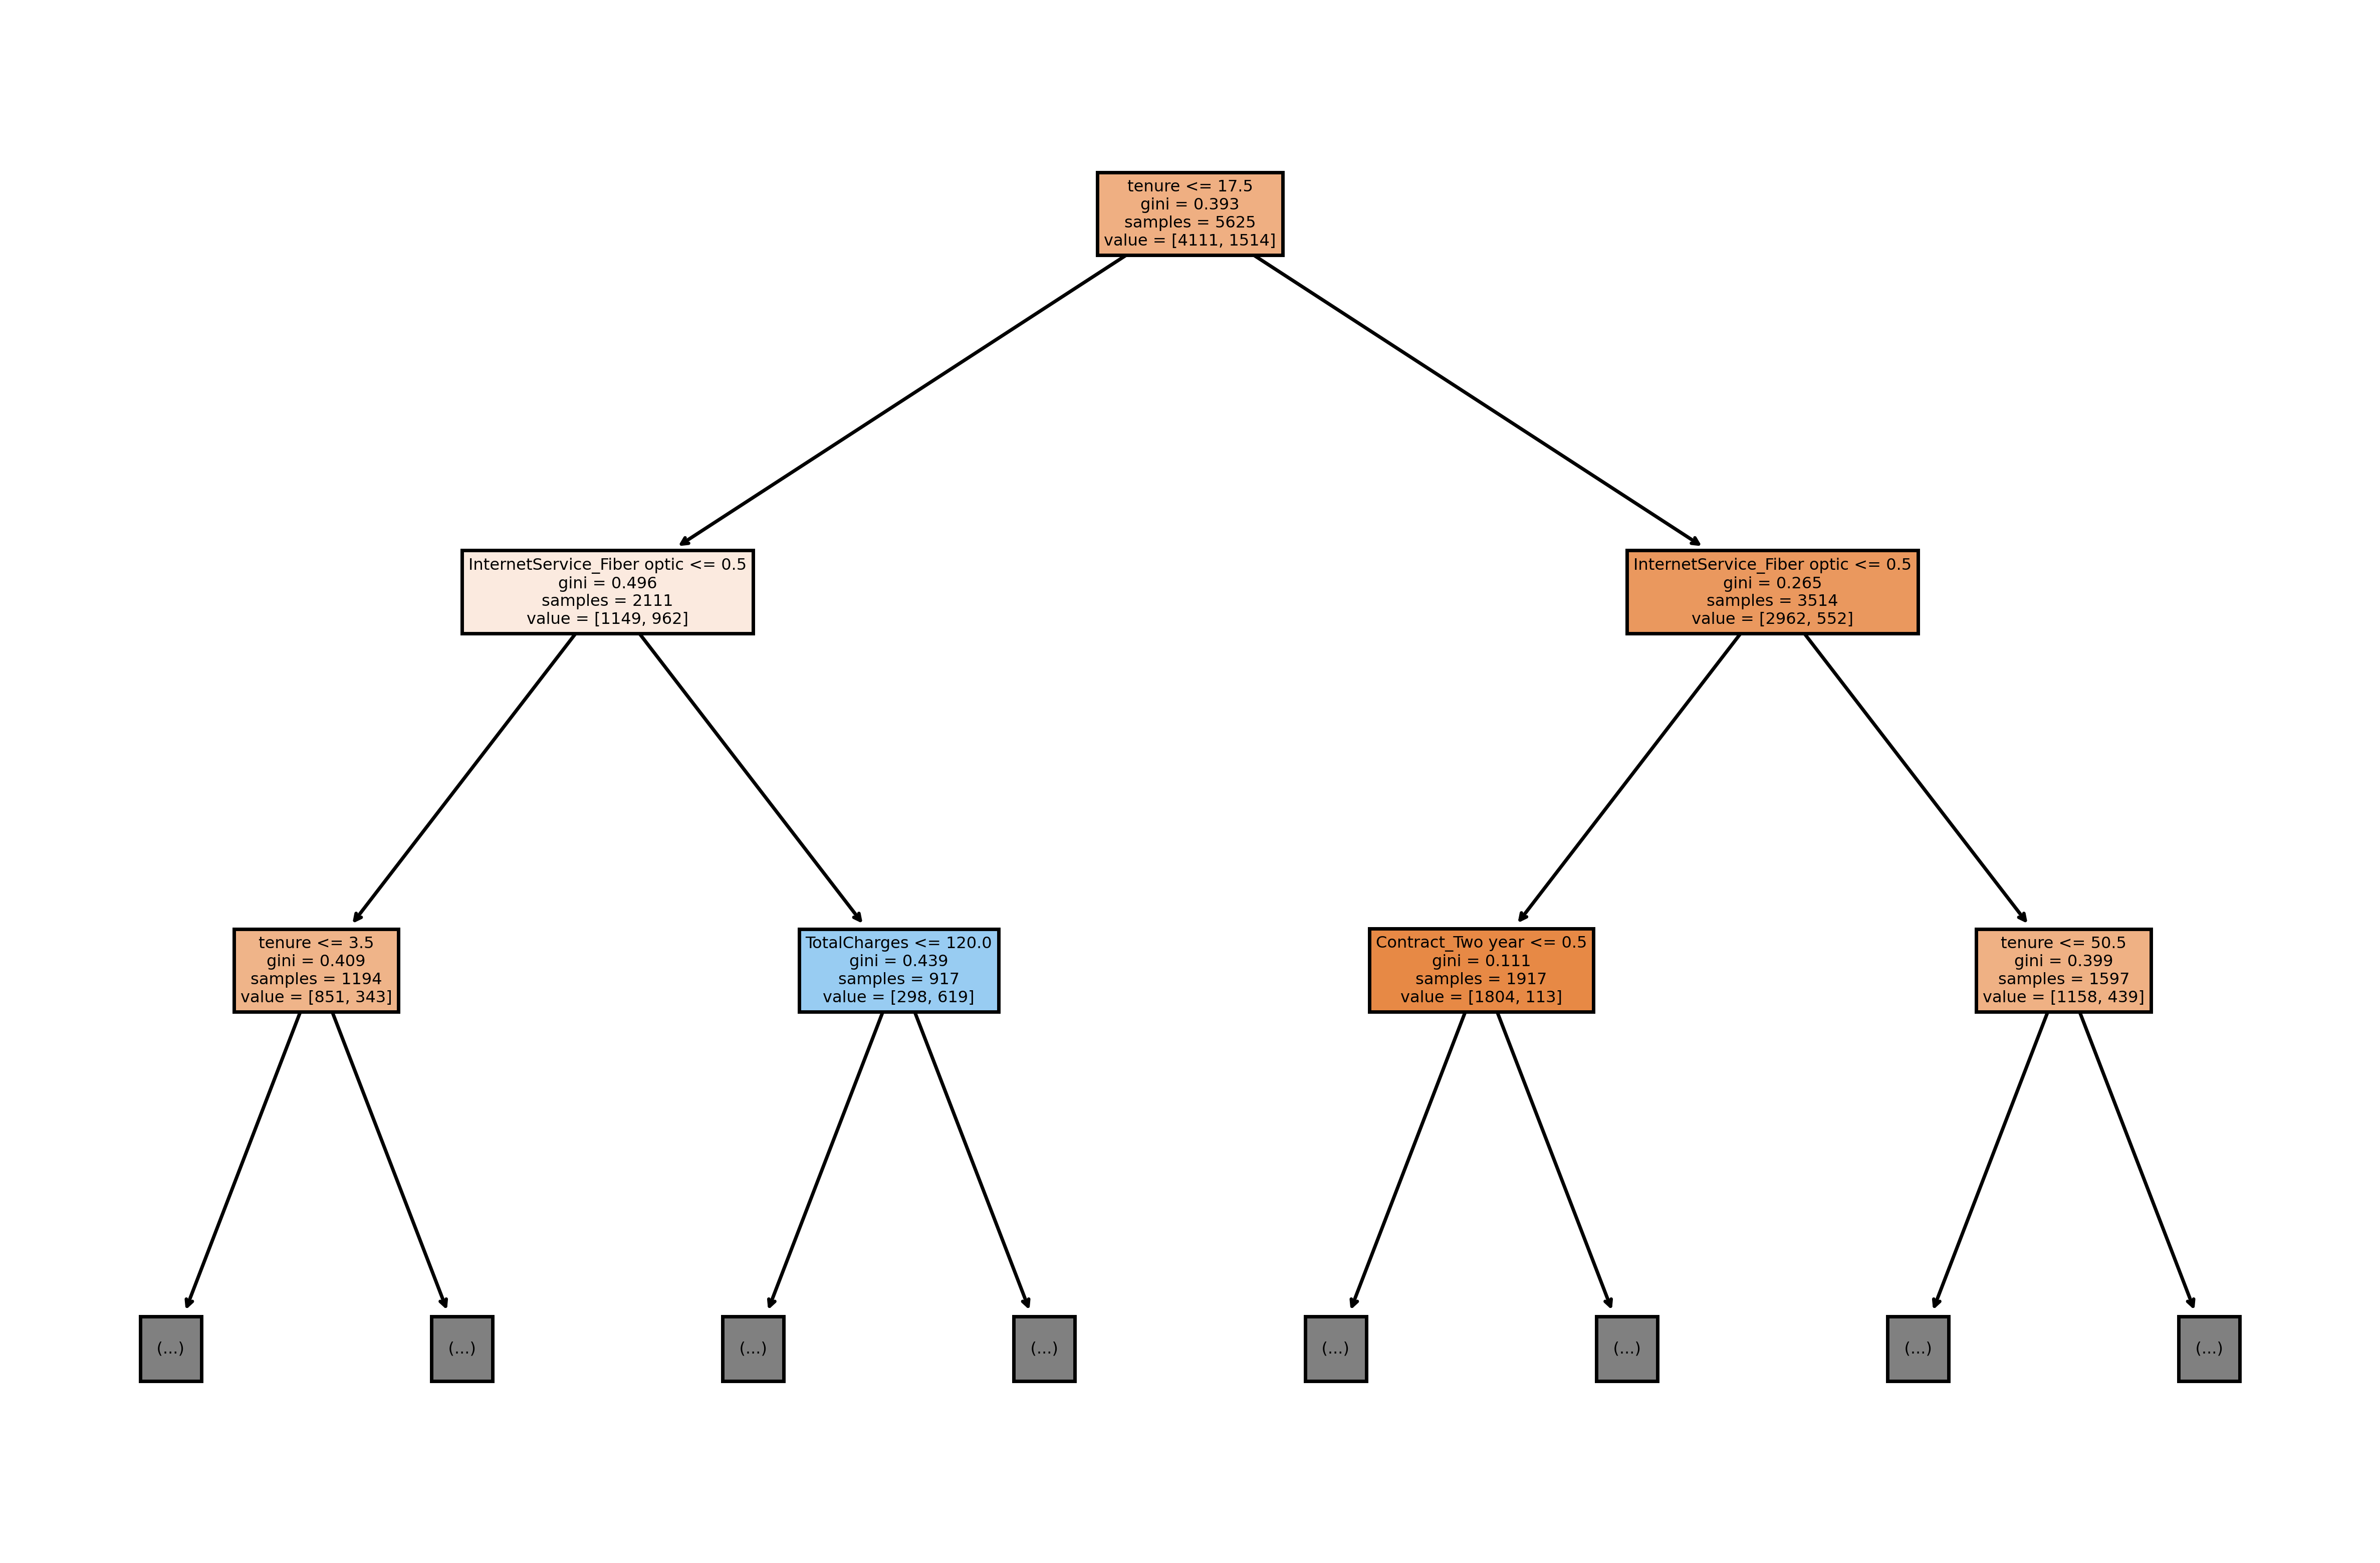

In [52]:
plt.figure(figsize=(12,8),dpi=500)
plot_tree(dt,filled=True,feature_names=X.columns,max_depth=2);

## Random Forest Algorithm
* Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
* As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
* The below diagram explains the working of the Random Forest algorithm:

## How does Random Forest algorithm work?
* Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.
#### The Working process can be explained in the below steps and diagram:
* Step-1: Select random K data points from the training set.
* Step-2: Build the decision trees associated with the selected data points (Subsets).
* Step-3: Choose the number N for decision trees that you want to build.
* Step-4: Repeat Step 1 & 2.
* Step-5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

### Importing, Training and Evaluating RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(scaled_X_train,y_train)
preds = rf.predict(scaled_X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1052
         Yes       0.60      0.47      0.53       355

    accuracy                           0.79      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



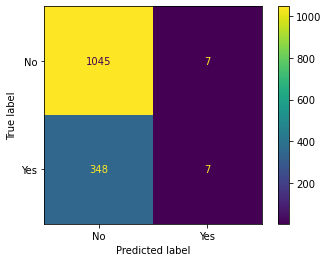

In [55]:
plot_confusion_matrix(rf,X_test,y_test)

So, we have a accuracy of 0.80.

* Let find the hyperparameter through gridsearchcv.

In [56]:
param_grid_rf = {
             "n_estimators":[100,200,500,1000],
'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 6, 10, 14, 20]}
from sklearn.model_selection import GridSearchCV

In [57]:
grid_rf =GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid_rf)

In [ ]:
grid_rf.fit(X_train,y_train)
